# Welcome to Lab: GPA 🎓

In this lab, you'll explore the GPA dataset again to find out more about the courses at Illinois!

Fun fact: the dataset you're using in this lab is the same dataset that Professor Wade uses to make the GPA visualizations! :)  Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)


A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Alex"
ca1_name = "Annie"
ca2_name = "Elaina"
ca3_name = "Victoria"


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What's your favorite social media?"
partner1_name = ""
partner1_netid = ""
partner1_favsocialmedia = ""

partner2_name = ""
partner2_netid = ""
partner2_favsocialmedia = ""

partner3_name = ""
partner3_netid = ""
partner3_favsocialmedia= ""

<hr style="color: #DD3403;">

# Part 1: Exploring GPA

## Load the GPA Dataset

Before we begin exploring the GPA Dataset, we've got to load it in! The most recent version of the "GPA Dataset" (up to Spring 2023) is available here:
```
https://waf.cs.illinois.edu/discovery/gpa.csv
```

Use Python to load this dataset into a DataFrame called `df`:

In [1]:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Students,Primary Instructor
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,0,1,0,22,"Shin, Jeongsu"
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,0,1,23,"Shin, Jeongsu"
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,0,1,0,0,0,1,0,21,"Lee, Sabrina Y"
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,0,1,0,1,0,33,"Sawada, Emilia"
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,0,33,"Kwon, Soo Ah"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69064,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,31,"Stepanov, Alexei G"
69065,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,28,"Unger, David"
69066,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,28,"Morgan, William T"
69067,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,21,"Ott-Monsivais, Stephanie"


### 🔬 Test Case Checkpoint 🔬

In [3]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df) == 69069), "This is not the GPA dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.1: The "Average GPA" Column
Each row in the GPA Dataset represents a **course section** at Illinois. For our exploratory data analysis, we are going to need an additional `Average GPA` column.

To create this column, we need to compute the **weighted average GPA** for each course section by taking into account the **number of students** who received each letter grade.

Add this new `Average GPA` column to our DataFrame `df` by finding the **products** of the **weight** associated with each **letter grade** and the number of said **letter grade** earned in each course section, **summing these products**, and then **dividing** by the **number of students** in the course section.

Remember:
- The **weight** of letter grades are as follows: $[A+ = 4.0, A = 4.0, A- = 3.67, \ldots  D- = 0.67, F = 0]$. <br> You can find a full scale at: https://registrar.illinois.edu/courses-grades/explanation-of-grades/
- The `Students` column of our DataFrame contains the number of students in a course section
- You've done this in your Mastery Platform homework before, now you're doing it for real :) 

In [9]:
df['Average GPA'] = (df["A+"]*4)+(df["A"]*4)+(df["A-"]*3.67)+(df["B+"]*3.33)+(df["B"]*3)+(df["B-"]*2.67)+(df["C+"]*2.33)+(df["C"]*2)+(df["C-"]*1.67)+(df["D+"]*1.33)+(df["D"]*1)+(df["D-"]*0.67)+(df["F"]*0)+(df["W"]*0)
df['Average GPA'] = df['Average GPA'] / df["Students"]
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,1,0,22,"Shin, Jeongsu",3.530909
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,0,0,0,0,0,0,1,23,"Shin, Jeongsu",3.797391
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,0,1,0,0,0,1,0,21,"Lee, Sabrina Y",3.476667
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,1,0,1,0,33,"Sawada, Emilia",3.606364
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,0,0,0,0,0,0,0,33,"Kwon, Soo Ah",3.889091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69064,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,3,0,0,0,2,1,31,"Stepanov, Alexei G",3.183226
69065,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,28,"Unger, David",3.774643
69066,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,1,1,0,2,0,1,0,28,"Morgan, William T",2.595714
69067,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,2,0,0,1,1,0,21,"Ott-Monsivais, Stephanie",2.603333


### 🔬 Test Case Checkpoint 🔬

In [10]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df) == 69069  ), "You shouldn't be changing the length of `df` when computing Average GPA."
assert( "Average GPA" in df.columns), "Make sure your new column is named 'Average GPA'."
assert( math.isclose(df['Average GPA'].mean(), 3.3701121347989282)), "Your calculation of the Average GPA is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.2: The "Hardest" and "Easiest" Courses?
One way to judge a course's difficulty is to consider its **Average GPA**. 

Using the `Average GPA` column and the two cells below, find:
- The **50** courses with the **lowest** `Average GPA`, storing in the DataFrame `df_hard`
- The **50** courses with the **highest** `Average GPA`, storing the DataFrame `df_easy` 

In [52]:
df_hard = df.sort_values(by="Average GPA", ascending=True)[:50]
# df_hard = df.nsmallest(50,"Average GPA")
df_hard

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
6215,2022,Spring,2022-sp,GS,199,College Academic Success,LCD,1,0,0,...,2,0,2,1,2,12,0,26,"Walk, Aaron J",1.140385
24225,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,ONL,0,0,1,...,1,2,1,1,0,15,0,28,"Taylor, Don",1.142857
8220,2021,Fall,2021-fa,CLCV,100,Vocab Building-GRK & LAT Roots,ONL,2,0,3,...,1,0,1,2,3,20,0,40,"Augoustakis, Antonios",1.208750
36697,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,4,1,1,1,1,10,0,24,"Hawking, Carol J",1.319583
44510,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,ONL,0,4,0,...,4,1,0,1,0,15,1,30,"Hershfield, David",1.400000
9322,2021,Fall,2021-fa,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,3,0,2,0,1,11,0,26,"Ashby, Steven",1.410385
46778,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,ONL,0,1,3,...,3,0,0,0,2,11,0,25,"Cohen, Margaret L",1.427600
49575,2013,Fall,2013-fa,MATH,2,Introductory Algebra,LCD,0,0,0,...,10,5,3,3,2,5,3,31,"Aydin-Mullen, Yelda",1.430645
46853,2014,Spring,2014-sp,MATH,220,Calculus,LBD,0,3,0,...,5,0,2,1,0,11,1,28,"Gilbert, Rebekah A",1.476071
21497,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,ONL,0,2,1,...,0,0,0,2,1,9,0,21,"Cohen, Margaret L",1.491905


In [64]:
# df_easy = df.sort_values(by="Average GPA", ascending=False)[:50]
df_easy = df.nlargest(50, "Average GPA")
df_easy

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
22401,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,0,0,0,286,"Ludaescher, Bertram",3.995350
12466,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,0,419,NaN,3.995203
4472,2022,Fall,2022-fa,MUSC,487,Marching Illini,PR,0,289,0,...,0,0,0,0,0,0,1,291,"Houser, Barry L",3.993127
35355,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,0,0,0,141,"Nekrasz, Frank",3.992908
31268,2017,Spring,2017-sp,EPSY,490,Prep for Recruitment Counselor,NaN,69,14,0,...,0,0,0,0,0,0,0,84,"Brown, Dawn M",3.992024
44790,2014,Fall,2014-fa,ME,199,Automotive Design Projects,LBD,8,111,0,...,0,0,0,0,0,0,0,120,"Philpott, Michael L",3.991667
32858,2016,Fall,2016-fa,ANSC,103,Working With Farm Animals,NaN,0,79,0,...,0,0,0,0,0,0,0,80,"Cobb, Alan R",3.991625
37829,2015,Fall,2015-fa,ANSC,103,Working With Farm Animals,LEC,0,76,0,...,0,0,0,0,0,0,0,77,"Cobb, Alan R",3.991299
7279,2022,Spring,2022-sp,VCM,673,Companion Animal Rehab,LCD,69,2,0,...,0,0,0,0,0,0,0,72,"Knap, Kimberly E",3.990694
54859,2012,Fall,2012-fa,MUS,273,Marching Illini,PR,0,308,0,...,0,0,0,0,0,0,0,311,"Houser, Barry L",3.990354


Now, using your two new DataFrames (`df_hard` and `df_easy`), find:
- The **mean course number** of the 50 hardest courses by GPA, storing in the variable `hard_avg`
- The **mean course number** of the 50 easiest courses by GPA, storing in the variable `easy_avg`

The **course number** of a course is stored in the **'Number'** column of our DataFrames. 

In [65]:
hard_avg = df_hard["Number"].mean()
hard_avg

166.42

In [66]:
easy_avg = df_easy["Number"].mean()
easy_avg

375.56

### 🔬 Test Case Checkpoint 🔬

In [67]:
## == TEST CASE for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_hard) == len(df_easy) == 50 ), "Your df_hard and df_easy should be picking the 50 courses with the lowest / highest average GPA respectively. Please double check that you are selecting 50 courses."
assert( math.isclose(df_hard['Average GPA'].sum(), 80.30481775738464) ), "Your df_hard is calculated incorrectly. Make sure you are finding the 50 courses with the lowest Average GPA."
assert( math.isclose(df_easy['Average GPA'].sum(), 199.38547959954138) ), "Your df_easy is calculated incorrectly. Make sure you are finding the 50 courses with the highest Average GPA."
assert( math.isclose(hard_avg, 166.42) ), "Your calculation for the average course number of 'hard' courses is incorrect. Make sure you are finding the mean of course numbers of df_hard."
assert( math.isclose(easy_avg, 372.74) or math.isclose(easy_avg, 375.56)), "Your calculation for the average course number of 'easy' courses is incorrect. Make sure you are finding the mean of course numbers of df_easy."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Courses? 

**Q1: After solving Puzzle 1.2, your friend has the following claim:**

> *"We know that the undergraduate courses are coded from 001 to 499, where a larger number (in the hundreds place) usually implies more advanced material.  Based on our results in the previous puzzles, the data shows that the junior-level and senior-level courses are clearly not the hardest courses at UIUC."*

**Comment on your friend's claim below. Do you think they are correct? Explain why or why not in at least three complete sentences.**

*(✏️ No, there are not enough students in the hard courses to prove that they're hard. We will need more students to prove that the course is hard overall and not affected by a few outliers. The easy courses also had very few students so there is not enough evidence to prove they are easy as well. ✏️)*

<hr style="color: #DD3403;">

# Part 2: GPA By Subject
We've explored some of the GPA Dataset as a whole, but what if we want to investigate **differences in GPA by subject**? 

### Puzzle 2.1: Grouping by Subject
To look into the different Average GPAs for each Subject, we need to **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_subject`, which will contain this grouped GPA data. Using `df.groupby()`, **group** our original DataFrame (`df`) by `Subject` so each **letter grade column** contains the **total number of students** receiving the same grade in that `Subject`. 

**NUMERIC ONLY**: For the agg function in the lab, we want to aggregate only the numeric columns:
- To do this, when you use `.agg("...")`, include the option `numeric_only=True`.
- For example, to aggregate by `sum`, you would use: `.agg("sum", numeric_only=True)`.
- Instead, to aggregate by `count`, you would use: `.agg("count", numeric_only=True)`.

**DO I USE `count` or `sum`?**:
- Each row in `df` represents a **course section** of a `Subject` with the **number of students** receiving grades for that course.
- Do you want to "count" the number of rows, or "sum" the number of students receiving each grade?
- And, don't forget to `.reset_index()`. :)

In [70]:
df_subject = df.groupby("Subject").agg("sum").reset_index()
df_subject

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,AAS,487957,SpringSpringSpringSpringSpringFallFallFallFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2022-fa2022...,30830,Intro Asian American StudiesIntro Asian Americ...,DISDISDISLCDLCDDISDISDISDISDISDISDISDISLCDLCDL...,1046,2848,1034,...,174,70,38,44,23,121,27,7171,"Shin, JeongsuShin, JeongsuLee, Sabrina YSawada...",850.634524
1,ABE,334687,SpringSpringSpringSpringSpringSpringFallFallFa...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2022...,55670,ABE Principles: BiologicalWater in Global Envi...,LECONLOLCLCDLCDLCDLECLCDOLCLECLCDONLLCDLCDLCDL...,554,3294,912,...,204,51,19,52,8,74,21,7443,"Leonelli, Laurie BKalita, Prasanta KWitmer, An...",582.572077
2,ACCY,5724312,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,1071001,Fundamentals of AccountingFundamentals of Acco...,ONLONLLCDLECLECLECLECLECLECLCDLCDLCDLCDLCDLCDL...,14063,35903,21755,...,3135,1547,442,866,286,889,353,128521,"Zhang, LiGreen, Danielle HZhang, LiFisher, Mit...",9662.346404
3,ACE,2278417,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,317378,Intro to Applied MicroIntro to Applied MicroMi...,DISDISONLOLBOLBLECONLONLLECLCDLCDONLLCDOLCLECL...,7881,19032,6734,...,3125,1025,483,884,288,979,148,60523,"Hadunka, ProtensiaHadunka, ProtensiaBurnett, M...",3735.976531
4,ACES,372980,SpringFallFallFallFallFallFallFallFallFallFall...,2023-sp2022-fa2022-fa2022-fa2022-fa2022-fa2022...,21429,Intro Sustainable Food SystemsContemporary Iss...,LCDDISDISDISDISDISDISDISDISDISDISDISDISONLONLL...,1415,2166,358,...,99,40,23,36,18,93,10,4924,"Ball, Anna LEdmonds, Devin AKnepp, Aleksi REmm...",679.355496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,UP,729848,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,129060,"Urban Informatics IUrban SustainabilityRace, S...",LECLECLCDLCDLCDLCDLECLECLECLCDLCDLECLCDLCDOLCL...,1480,4861,2491,...,346,164,49,101,68,232,43,13708,"Fang, FangAllred, DustinSalo, Ken EEdwards, Ma...",1269.489026
168,VB,8040,FallSpringSpringSpring,2010-fa2010-sp2010-sp2010-sp,2489,ToxicologyPharmacology IINutritional Aspect Fo...,LECLECLECLEC,0,212,6,...,40,0,0,2,0,0,0,387,"Dunayer, Eric KFerguson, Duncan CWallace, Rich...",13.974534
169,VCM,100737,SpringSpringSpringSpringSpringSpringFallFallFa...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2022...,31625,Introduction to Veterinary SciScience of Healt...,ONLONLONLLECONLLCDONLONLONLLCDLCDONLLCDLCDLCDL...,497,1594,35,...,350,1,1,42,0,4,0,3695,"Lowe, James FAldridge, Brian MAldridge, Brian ...",177.305433
170,VM,252090,SpringSpringSpringSpringSpringFallFallFallFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2022-fa2022...,76368,Structure and Function IIStructure and Functio...,LECLECLECLECLECLECLECLECLECLECLECLECLECLECLECP...,0,2760,8,...,4587,0,0,515,0,18,10,15654,"Ko, CheMyongForeman, Jonathan HVieson, Miranda...",354.664640


### 🔬 Test Case Checkpoint 🔬

In [71]:
## == TEST CASE for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_subject' in vars() ), "Make sure your DataFrame grouped by 'Subject' is named 'df_subject'." 
assert( len(df_subject) == 172 ), "Make sure you are grouping by 'Subject'. There are 172 Subjects in our original `df`, so the length of `df_subject` should be 172."
assert( math.isclose(df_subject.Students.mean(), 23723.837209302324) ), "Double-check that you are aggregating your df_subject correctly."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.2: Fixing our `Average GPA` Column
Your intuition may tell you that some columns in `df_subject` look off. This is correct - given the way we've grouped the data to find **total student counts** by grade, the `Year` and `Average GPA` columns are incorrect. 

Let's fix this by redefining the `Average GPA` column in our `df_subject`.

The `Average GPA` column should contain the **weighted average GPA** of each `Subject` by taking into account the **number of students** who received each letter grade in said `Subject`. 

Remember:
- The **weight** of letter grades are as follows: $[A+ = 4.0, A = 4.0, A- = 3.67, \ldots  D- = 0.67, F = 0]$. <br> You can find a full scale at: https://registrar.illinois.edu/courses-grades/explanation-of-grades/
- The `Students` column of our DataFrame contains the number of students in a `Subject`
- This Puzzle is **strikingly similar** to **Puzzle 1.1** in this lab - just make sure you use `df_subject` this time! 

In [81]:
df_subject['Average GPA'] = (df_subject["A+"]*4)+(df_subject["A"]*4)+(df_subject["A-"]*3.67)+(df_subject["B+"]*3.33)+(df_subject["B"]*3)+(df_subject["B-"]*2.67)+(df_subject["C+"]*2.33)+(df_subject["C"]*2)+(df_subject["C-"]*1.67)+(df_subject["D+"]*1.33)+(df_subject["D"]*1)+(df_subject["D-"]*0.67)+(df_subject["F"]*0)+(df_subject["W"]*0)
df_subject['Average GPA'] = df_subject['Average GPA'] / df_subject["Students"]
df_subject

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,AAS,487957,SpringSpringSpringSpringSpringFallFallFallFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2022-fa2022...,30830,Intro Asian American StudiesIntro Asian Americ...,DISDISDISLCDLCDDISDISDISDISDISDISDISDISLCDLCDL...,1046,2848,1034,...,174,70,38,44,23,121,27,7171,"Shin, JeongsuShin, JeongsuLee, Sabrina YSawada...",3.523670
1,ABE,334687,SpringSpringSpringSpringSpringSpringFallFallFa...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2022...,55670,ABE Principles: BiologicalWater in Global Envi...,LECONLOLCLCDLCDLCDLECLCDOLCLECLCDONLLCDLCDLCDL...,554,3294,912,...,204,51,19,52,8,74,21,7443,"Leonelli, Laurie BKalita, Prasanta KWitmer, An...",3.523195
2,ACCY,5724312,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,1071001,Fundamentals of AccountingFundamentals of Acco...,ONLONLLCDLECLECLECLECLECLECLCDLCDLCDLCDLCDLCDL...,14063,35903,21755,...,3135,1547,442,866,286,889,353,128521,"Zhang, LiGreen, Danielle HZhang, LiFisher, Mit...",3.427036
3,ACE,2278417,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,317378,Intro to Applied MicroIntro to Applied MicroMi...,DISDISONLOLBOLBLECONLONLLECLCDLCDONLLCDOLCLECL...,7881,19032,6734,...,3125,1025,483,884,288,979,148,60523,"Hadunka, ProtensiaHadunka, ProtensiaBurnett, M...",3.331010
4,ACES,372980,SpringFallFallFallFallFallFallFallFallFallFall...,2023-sp2022-fa2022-fa2022-fa2022-fa2022-fa2022...,21429,Intro Sustainable Food SystemsContemporary Iss...,LCDDISDISDISDISDISDISDISDISDISDISDISDISONLONLL...,1415,2166,358,...,99,40,23,36,18,93,10,4924,"Ball, Anna LEdmonds, Devin AKnepp, Aleksi REmm...",3.650971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,UP,729848,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,129060,"Urban Informatics IUrban SustainabilityRace, S...",LECLECLCDLCDLCDLCDLECLECLECLCDLCDLECLCDLCDOLCL...,1480,4861,2491,...,346,164,49,101,68,232,43,13708,"Fang, FangAllred, DustinSalo, Ken EEdwards, Ma...",3.465470
168,VB,8040,FallSpringSpringSpring,2010-fa2010-sp2010-sp2010-sp,2489,ToxicologyPharmacology IINutritional Aspect Fo...,LECLECLECLEC,0,212,6,...,40,0,0,2,0,0,0,387,"Dunayer, Eric KFerguson, Duncan CWallace, Rich...",3.448760
169,VCM,100737,SpringSpringSpringSpringSpringSpringFallFallFa...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2022...,31625,Introduction to Veterinary SciScience of Healt...,ONLONLONLLECONLLCDONLONLONLLCDLCDONLLCDLCDLCDL...,497,1594,35,...,350,1,1,42,0,4,0,3695,"Lowe, James FAldridge, Brian MAldridge, Brian ...",3.450411
170,VM,252090,SpringSpringSpringSpringSpringFallFallFallFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2022-fa2022...,76368,Structure and Function IIStructure and Functio...,LECLECLECLECLECLECLECLECLECLECLECLECLECLECLECP...,0,2760,8,...,4587,0,0,515,0,18,10,15654,"Ko, CheMyongForeman, Jonathan HVieson, Miranda...",2.814362


### 🔬 Test Case Checkpoint 🔬

In [82]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_subject) == 172 ), "You shouldn't be changing the length of `df_subject` when recomputing Average GPA."
assert( "Average GPA" in df_subject.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_subject['Average GPA'].mean(), 3.4643567698520825) ), "Your calculation of the Average GPA by Subject is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3: The "Hardest" and "Easiest" Subjects?
One way we can judge a Subject's difficulty is to consider its **Average GPA**. 

Using your `df_subject`'s  `Average GPA` column and the two cells below, find:
- The **10** Subjects with the **lowest** `Average GPA`, storing in the DataFrame `hard_subjects`
- The **10** Subjects with the **highest** `Average GPA`, storing the DataFrame `easy_subjects` 

In [87]:
hard_subjects = df_subject.nsmallest(10, "Average GPA")
hard_subjects

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
170,VM,252090,SpringSpringSpringSpringSpringFallFallFallFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2022-fa2022...,76368,Structure and Function IIStructure and Functio...,LECLECLECLECLECLECLECLECLECLECLECLECLECLECLECP...,0,2760,8,...,4587,0,0,515,0,18,10,15654,"Ko, CheMyongForeman, Jonathan HVieson, Miranda...",2.814362
161,TAM,755986,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,117633,Introduction to StaticsStaticsIntroductory Dyn...,LCDLCDLCDLCDLECLECLCDLCDLCDLCDLCDLBDLCDLECLECL...,2675,6095,4562,...,2826,1679,1005,1222,575,1382,182,37748,"Juarez, GabrielJuarez, GabrielChadha, CharulWe...",2.885195
115,MATH,5458565,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,841034,Theory of ArithmeticAlgebraPreparation for Cal...,LECLECLECLCDLCDLCDLCDLCDLCDLCDLECLECLECLECLCDL...,16620,41016,24270,...,18362,9643,5397,6770,2807,8879,1737,223063,"Placzek, Laura ELe, Thanh Thi THoffmeister, Ap...",2.902823
108,LAT,12076,SpringSpringFallFallSpringSummer,2016-sp2015-sp2012-fa2011-fa2011-sp2011-su,613,Elementary Latin IIElementary Latin IElementar...,LCDLCDLCDLCDLCDLCD,14,20,17,...,6,3,1,3,2,8,0,132,"Foulk, John MKozak, Adam ADee, Nicholas MYona,...",2.944394
147,SAME,6039,FallFallFall,2015-fa2014-fa2010-fa,437,The New Middle EastThe New Middle EastIntro to...,LCDLCDLEC,2,29,30,...,17,5,2,2,3,5,1,172,"Hoffman, Valerie JHoffman, Valerie JCuno, Kenn...",2.949884
132,PHYS,2076631,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,298142,College Physics: Mech & HeatCollege Physics: M...,LECLECLECLECLECLECLECLECLECLECLECLECLECLECLECL...,18520,20376,13790,...,9494,7169,4442,3233,3718,2073,821,130592,"Ansell, Katherine AAnsell, Katherine AHolder, ...",2.955341
40,CHBE,677626,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,140624,Principles of CHEThermodynamicsProbability and...,LECLECLECLECLECLECLECLECLECLECLECLECLECLCDLCDL...,988,4587,2475,...,2491,872,183,412,75,314,85,22321,"Rogers, SimonHammack, William SPeters, Baron G...",3.021324
41,CHEM,3924326,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,379984,Introductory ChemistryGeneral Chemistry IGener...,LECLECLECLECLECLECLECLECLECLECLECLECONLDISDISL...,19423,55822,23212,...,17937,9987,4886,5084,2748,5187,1425,228191,"McCarren, Elise MHummel, Thomas JGunasekera, M...",3.047261
117,MCB,4814562,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,608507,Introductory MicrobiologyIntro Microbiology La...,LECLABLABLABLABDISDISDISDISDISDISDISDISDISDISD...,10011,17923,14552,...,6245,3577,2085,1644,947,1475,449,103719,"Kieffer, Collin DAlt, Renee LAlt, Renee LAlt, ...",3.097746
131,PHIL,1196896,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,102848,Logic and ReasoningLogic and Reasoning QR IIIn...,ONLDISLCDLECLCDLCDLCDLCDLCDLCDLCDLCDDISDISDISO...,1046,4652,3726,...,850,481,210,290,213,943,129,21236,"Muntean, Ioan LNowakowski, PaulSavonius-Wroth,...",3.103471


In [88]:
easy_subjects = df_subject.nlargest(10, "Average GPA")
easy_subjects

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
124,MUSC,64702,SpringSpringSpringSpringSpringSpringSpringFall...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,15116,University ChorusWomen's Glee ClubMen's Glee C...,PRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPR...,243,1606,43,...,10,2,0,3,0,13,2,1983,"Bruhn, Andrew KSolya, AndreaColeman, Barringto...",3.919869
68,ERAM,16178,SpringSpringFallFallFallFallSpringSpring,2023-sp2023-sp2022-fa2022-fa2022-fa2022-fa2022...,4498,Case Studies in Educ EthicsSurvey Design IMeth...,ONLONLONLONLONLONLONLONL,57,133,33,...,0,0,0,1,0,0,0,241,"Taylor, Rebecca MLindgren, Samantha AHinze-Pif...",3.881411
38,CB,4022,SpringSpring,2011-sp2011-sp,1250,Nutritional Aspect Food An MedNutritional Aspe...,LECLEC,0,140,0,...,1,0,0,0,0,0,2,158,"Firkins, Lawrence DForeman, Jonathan H",3.879747
37,BUS,845103,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,58504,Coaching for SuccessBusiness DynamicsBusiness ...,LCDLCDLCDLCDLCDLCDLCDLCDLCDLCDLCDLCDLCDONLONLL...,1322,9705,1544,...,55,14,16,20,10,42,15,13979,"Thoss, CoreyLuckman, ElizabethLuckman, Elizabe...",3.852386
166,UKR,10070,FallSpringSpringSpringSpring,2022-fa2014-sp2013-sp2011-sp2010-sp,565,Ukrainian CultureUkrainian CultureUkrainian Cu...,LCDLCDLCDLCDLCD,10,206,46,...,1,0,0,0,1,0,2,298,"Ivashkiv, Roman ZWallo, Oleksandra IChumachenk...",3.835906
44,CHP,44439,SpringFallFallFallFallFallSpringFallFallFallSp...,2023-sp2022-fa2022-fa2022-fa2022-fa2022-fa2022...,4575,Special Topics: Uncommon ReadsHonors Uncommon ...,DISODODODDISDISDISODDISDISONLODODONLDISDISCNF,210,299,52,...,6,1,1,0,0,6,1,622,"Fitzjarrald, Amy EWhite, Zuri LWhite, Zuri LJa...",3.835675
139,REES,6047,SpringSpringSpring,2018-sp2015-sp2014-sp,603,Introduction to Eastern EuropeIntroduction to ...,LECLEC,32,34,7,...,0,0,0,1,0,0,0,83,"Pintar, Judith APintar, Judith APintar, Judith A",3.827590
13,ALEC,18196,SpringSpringSpringFallFallFallFallSpringFall,2023-sp2023-sp2023-sp2022-fa2022-fa2021-fa2021...,3245,Adult Training and Development110%?Princ of Ad...,ONLONLONLLCDLCDLCDLCDONLOD,102,124,23,...,1,2,2,0,0,3,0,276,"Rosch, David MRosch, David MRosch, David MOchs...",3.820217
64,EOL,120952,SpringSpringFallFallFallFallSpringSummerSummer...,2021-sp2021-sp2020-fa2020-fa2020-fa2020-fa2020...,32561,"Diversity, Leadership & PolicyDiversity in Hig...",ONLONLONLONLONLONLONLONLONLONLONLONLONLLCDLCDL...,94,1376,267,...,9,0,0,6,0,10,3,2012,"Nelson, Jennifer LDel Real Viramo, JoseBruno, ...",3.812202
137,PSM,20167,FallFallFallFallSpringFallFallSpringFallSpring,2022-fa2019-fa2018-fa2017-fa2017-sp2016-fa2015...,5015,PSM Industry Seminar IPSM Industry Seminar IPS...,LCDLECLECLCDLCDLECLCD,140,54,16,...,3,2,0,0,0,1,0,240,"Bosecker, Natalie BBosecker, Natalie BBosecker...",3.811333


### 🔬 Test Case Checkpoint 🔬

In [89]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(hard_subjects) == len(easy_subjects) == 10 ), "Make sure you are selecting the ten hardest or easiest subjects by GPA. This means your hard_subjects and easy_subjects DataFrames should both have exactly ten rows."
assert( math.isclose(hard_subjects['Average GPA'].sum(), 29.72180057281505) ), "Your calculation for the hardest subjects by GPA is incorrect. Remember, here harder = lower Average GPA."
assert( math.isclose(easy_subjects['Average GPA'].sum(), 38.47633638756495) ), "Your calculation for the easiest subjects by GPA is incorrect. Remember, here easier = higher Average GPA."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Subjects? 

**Q2: Observe the `Subject` column of the `hard_subjects` and `easy_subjects` you've found in Puzzle 2.3 above. Do you think these are truly the "Hardest" and "Easiest" subjects at Illinois? Explain why or why not.** 


*Note: You can use http://catalog.illinois.edu/courses-of-instruction/ to find what the different `Subject` codes mean.*


*(✏️ This gives us an idea on which subjects would be hard but doesn't prove the subject to be hard because some courses may have more higher leveled courses than others. ✏️)*

### Puzzle 2.4: Visualizing GPA by Subject
We've got the **Average GPA** of each `Subject` at Illinois, but what if we want to look at the **bigger picture** across all subjects? Well, data visualization comes to the rescue!

Generate a **histogram** of the **Average GPA** in your `df_subject`:

<Axes: ylabel='Frequency'>

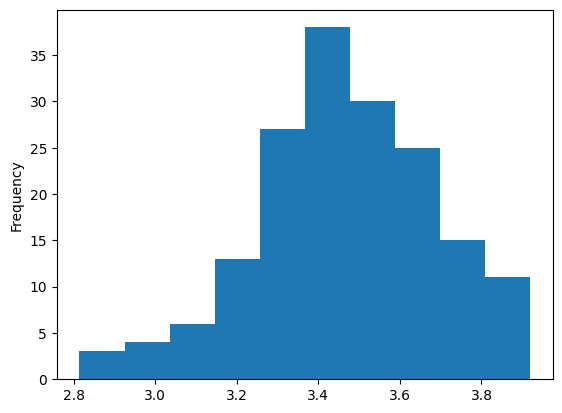

In [91]:
df_subject["Average GPA"].plot.hist()

### Analysis: Histogram Interpretations

**Q3: Based on the histogram you generated above, what do you think the Average GPA across all courses in a typical Subject at Illinois is? No need for an exact answer, just estimate.** 


*(✏️ Around 3.5. ✏️)*

### Puzzle 2.5: Your Major! 
We've done a lot of analysis on every course and every subject, but Data Science should also be personal to you!

Using your `df_subject`, isolate the row containing the `Subject` of **your Major**, storing in the variable `my_subject`:

(If you're undecided, you can pick any `Subject`!)

In [94]:
my_subject = df_subject[df_subject["Subject"] == "FIN"]
my_subject

,Subject,Year,Term,YearTerm,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
74,FIN,3627130,SpringSpringSpringSpringSpringSpringSpringSpri...,2023-sp2023-sp2023-sp2023-sp2023-sp2023-sp2023...,712121,Corporate FinanceCorporate FinanceCorporate Fi...,DISDISDISDISDISDISDISDISDISDISDISONLONLLCDLCDO...,5967,33438,14536,...,3118,871,525,867,83,909,261,91742,"Dyer, Michael ADyer, Michael ADyer, Michael AD...",3.436931


### Analysis: Your Major's Average GPA

**Q4: Observe the `Average GPA` column of your subject from Puzzle 2.5 above. Is it higher or lower than you expected?** 


*(✏️ Lower than I expected because I thought business majors have higher GPAs. ✏️)*

<hr style="color: #DD3403;">

# Part 3: GPA By Year
At this point, we've investigated the GPA Dataset as a whole and grouped by `Subject`. While our GPA Dataset contains **a lot** of course data, some of the listed courses are quite old: **dating back to 2010**! To put that into perspective, a senior in college now would be no more than **10 years old** in 2010. 

One can question the changes to GPA **over time**. Some questions may include:
- Has GPA gone up, because classes became "easier"? 
- Has the GPA fallen because of stricter grading policies? 
- How was GPA impacted in 2019-2020 at the brunt of COVID? 

You will gain some insight into the answers to questions in this section of the lab. 

### Puzzle 3.1: Grouping by Year
To look into how the GPA changes by `Year`, we need to again **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_year`, which will contain this grouped GPA data. Using `df.groupby()`, **group** our original DataFrame (`df`) by `Year` so each **letter grade column** contains the **total number of students** receiving said grade in that `Year`. 

Remember: You did something quite similar in Puzzle 2.1 to create `df_subject`. This might help you decide what type of **aggregation** (`.agg()`) to use when **grouping**.
- In this puzzle, you should also use `numeric_only=True` in your `agg` function, just like in Puzzle 2.1.
- And, don't forget to `.reset_index()`! :)

In [95]:
df_year = df.groupby("Year").agg("sum").reset_index()
df_year

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,2010,FallFallFallFallFallFallFallFallFallFallFallFa...,2010-fa2010-fa2010-fa2010-fa2010-fa2010-fa2010...,AASAASAASAASAASAASAASAASAASAASABEABEABEABEABEA...,1493480,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDDISDISDISLCDLECLECLECLCDLECL...,19355,77012,36814,...,15753,5812,2975,4438,1506,4511,1404,271071,"Winkelmann, Marie TKwon, YaejoonKwon, YaejoonA...",544.672045
1,2011,FallFallFallFallFallFallFallFallFallFallFallFa...,2011-fa2011-fa2011-fa2011-fa2011-fa2011-fa2011...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEACCY...,2180531,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISLCDLCDLECLECLECLECLECLCDL...,30104,116873,56123,...,23971,9576,4429,6884,2517,7389,1833,413086,"Kinase-Leggett, ElizabethKinase-Leggett, Eliza...",790.081612
2,2012,FallFallFallFallFallFallFallFallFallFallFallFa...,2012-fa2012-fa2012-fa2012-fa2012-fa2012-fa2012...,AASAASAASAASAASAASAASABEABEABEABEABEABEABEABEA...,822949,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISLECLECLECLECLECLCDLECLECL...,11834,44738,20603,...,8221,3307,1690,2218,936,2681,626,151677,"Carter, Regina SCarter, Regina SArai, SayuriDa...",277.195496
3,2013,FallFallFallFallFallFallFallFallFallFallFallFa...,2013-fa2013-fa2013-fa2013-fa2013-fa2013-fa2013...,AASAASAASAASAASAASAASABEABEABEABEABEABEACCYACC...,1468576,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISLCDLECLECLECLCDLECLECLCDLCDD...,22541,81114,37513,...,14875,6367,3103,4263,1851,4895,1072,276469,"Arai, SayuriArai, SayuriDavis, Thomas EDavis, ...",475.909924
4,2014,FallFallFallFallFallFallFallFallFallFallFallFa...,2014-fa2014-fa2014-fa2014-fa2014-fa2014-fa2014...,AASAASAASAASAASAASAASABEABEABEABEABEABEABEACCY...,1442419,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISLCDLECLECLECLECLCDLECLECONLD...,25404,79518,36863,...,14813,6584,3258,4644,2073,5380,1293,277497,"Thomas, Merin AThomas, Merin APeralta, Christi...",458.066182
5,2015,FallFallFallFallFallFallFallFallFallFallFallFa...,2015-fa2015-fa2015-fa2015-fa2015-fa2015-fa2015...,AASAASAASABEABEABEABEABEABEABEACCYACCYACCYACCY...,1518025,Intro Asian American StudiesIntro Asian Americ...,DISDISLCDLECLCDLECLECLECLECLECONLDISDISDISDISD...,29005,87375,39421,...,14909,6583,3562,4537,2057,5572,1327,295748,"Peralta, Christine NLee, Sang SCacho, Lisa MGr...",483.339931
6,2016,FallFallFallFallFallFallFallFallFallFallFallFa...,2016-fa2016-fa2016-fa2016-fa2016-fa2016-fa2016...,AASAASAASAASAASAASAASAASABEABEABEABEABEABEACCY...,1453915,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDLCDLCDLECLCDLCDLCDLECLCDONLL...,29090,85566,37979,...,14213,6120,3325,4273,1964,5800,1254,284766,"Chung, Ga YoungChung, Ga YoungLee, Jean YLee, ...",465.146323
7,2017,FallFallFallFallFallFallFallFallFallFallFallFa...,2017-fa2017-fa2017-fa2017-fa2017-fa2017-fa2017...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEABEA...,1513870,Intro Asian American StudiesIntro Asian Americ...,0,34894,92185,38313,...,14282,6128,3252,4600,2013,6161,1295,296845,"Espiritu, Augusto FPaik, Angela NSharif, Lila ...",483.261075
8,2018,FallFallFallFallFallFallFallFallFallFallFallFa...,2018-fa2018-fa2018-fa2018-fa2018-fa2018-fa2018...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEABEA...,1509394,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDLCDLCDLCDLECLECLECLECLECLECL...,40121,98620,39606,...,13404,5949,3335,4353,2042,6251,1121,305925,"Thomas, Merin ALee, Sang SKang, YoonjungThomas...",476.349939
9,2019,FallFallFallFallFallFallFallFallFallFallFallFa...,2019-fa2019-fa2019-fa2019-fa2019-fa2019-fa2019...,AASAASAASAASAASAASAASAASAASAASAASABEABEABEABEA...,1528969,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISDISLCDLCDLCDLECLCDLECLECL...,41642,104139,40875,...,13623,6117,3283,4434,2212,6914,1146,319344,"Boonsripaisal, SimonUhall, Michael BKang, Yoon...",470

### 🔬 Test Case Checkpoint 🔬

In [96]:
## == TEST CASE for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_year' in vars() ), "Make sure your DataFrame grouped by Year is named 'df_year'." 
assert( len(df_year) == 14 ), "Make sure you are grouping by 'Year'. There are 14 years in our original `df`, so the length of `df_years` should be 14."
assert( math.isclose(df_year.Students.mean(), 291464.28571428574) ), "Double-check that you are aggregating your df_year correctly."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Fixing our `Average GPA` Column Again
Some columns in `df_year` are incorrectly calculated given the way we've grouped the data.

Let's fix this by redefining the `Average GPA` column in our `df_year`.

The `Average GPA` column should contain the **weighted average GPA** of each `Year` by taking into account the **number of students** who received each letter grade in said `Year`. 

Remember: You've done this twice before in **Puzzle 1.1** and **Puzzle 2.2** - just make sure you use `df_year` this time! 

In [99]:
df_year["Average GPA"] = (df_year["A+"]*4)+(df_year["A"]*4)+(df_year["A-"]*3.67)+(df_year["B+"]*3.33)+(df_year["B"]*3)+(df_year["B-"]*2.67)+(df_year["C+"]*2.33)+(df_year["C"]*2)+(df_year["C-"]*1.67)+(df_year["D+"]*1.33)+(df_year["D"]*1)+(df_year["D-"]*0.67)+(df_year["F"]*0)+(df_year["W"]*0)
df_year['Average GPA'] = df_year['Average GPA'] / df_year["Students"]
df_year

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Students,Primary Instructor,Average GPA
0,2010,FallFallFallFallFallFallFallFallFallFallFallFa...,2010-fa2010-fa2010-fa2010-fa2010-fa2010-fa2010...,AASAASAASAASAASAASAASAASAASAASABEABEABEABEABEA...,1493480,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDDISDISDISLCDLECLECLECLCDLECL...,19355,77012,36814,...,15753,5812,2975,4438,1506,4511,1404,271071,"Winkelmann, Marie TKwon, YaejoonKwon, YaejoonA...",3.233537
1,2011,FallFallFallFallFallFallFallFallFallFallFallFa...,2011-fa2011-fa2011-fa2011-fa2011-fa2011-fa2011...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEACCY...,2180531,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISLCDLCDLECLECLECLECLECLCDL...,30104,116873,56123,...,23971,9576,4429,6884,2517,7389,1833,413086,"Kinase-Leggett, ElizabethKinase-Leggett, Eliza...",3.228032
2,2012,FallFallFallFallFallFallFallFallFallFallFallFa...,2012-fa2012-fa2012-fa2012-fa2012-fa2012-fa2012...,AASAASAASAASAASAASAASABEABEABEABEABEABEABEABEA...,822949,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISLECLECLECLECLECLCDLECLECL...,11834,44738,20603,...,8221,3307,1690,2218,936,2681,626,151677,"Carter, Regina SCarter, Regina SArai, SayuriDa...",3.253189
3,2013,FallFallFallFallFallFallFallFallFallFallFallFa...,2013-fa2013-fa2013-fa2013-fa2013-fa2013-fa2013...,AASAASAASAASAASAASAASABEABEABEABEABEABEACCYACC...,1468576,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISLCDLECLECLECLCDLECLECLCDLCDD...,22541,81114,37513,...,14875,6367,3103,4263,1851,4895,1072,276469,"Arai, SayuriArai, SayuriDavis, Thomas EDavis, ...",3.250664
4,2014,FallFallFallFallFallFallFallFallFallFallFallFa...,2014-fa2014-fa2014-fa2014-fa2014-fa2014-fa2014...,AASAASAASAASAASAASAASABEABEABEABEABEABEABEACCY...,1442419,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISLCDLECLECLECLECLCDLECLECONLD...,25404,79518,36863,...,14813,6584,3258,4644,2073,5380,1293,277497,"Thomas, Merin AThomas, Merin APeralta, Christi...",3.240724
5,2015,FallFallFallFallFallFallFallFallFallFallFallFa...,2015-fa2015-fa2015-fa2015-fa2015-fa2015-fa2015...,AASAASAASABEABEABEABEABEABEABEACCYACCYACCYACCY...,1518025,Intro Asian American StudiesIntro Asian Americ...,DISDISLCDLECLCDLECLECLECLECLECONLDISDISDISDISD...,29005,87375,39421,...,14909,6583,3562,4537,2057,5572,1327,295748,"Peralta, Christine NLee, Sang SCacho, Lisa MGr...",3.266786
6,2016,FallFallFallFallFallFallFallFallFallFallFallFa...,2016-fa2016-fa2016-fa2016-fa2016-fa2016-fa2016...,AASAASAASAASAASAASAASAASABEABEABEABEABEABEACCY...,1453915,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDLCDLCDLECLCDLCDLCDLECLCDONLL...,29090,85566,37979,...,14213,6120,3325,4273,1964,5800,1254,284766,"Chung, Ga YoungChung, Ga YoungLee, Jean YLee, ...",3.275170
7,2017,FallFallFallFallFallFallFallFallFallFallFallFa...,2017-fa2017-fa2017-fa2017-fa2017-fa2017-fa2017...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEABEA...,1513870,Intro Asian American StudiesIntro Asian Americ...,0,34894,92185,38313,...,14282,6128,3252,4600,2013,6161,1295,296845,"Espiritu, Augusto FPaik, Angela NSharif, Lila ...",3.301471
8,2018,FallFallFallFallFallFallFallFallFallFallFallFa...,2018-fa2018-fa2018-fa2018-fa2018-fa2018-fa2018...,AASAASAASAASAASAASAASAASAASABEABEABEABEABEABEA...,1509394,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISLCDLCDLCDLCDLECLECLECLECLECLECL...,40121,98620,39606,...,13404,5949,3335,4353,2042,6251,1121,305925,"Thomas, Merin ALee, Sang SKang, YoonjungThomas...",3.337837
9,2019,FallFallFallFallFallFallFallFallFallFallFallFa...,2019-fa2019-fa2019-fa2019-fa2019-fa2019-fa2019...,AASAASAASAASAASAASAASAASAASAASAASABEABEABEABEA...,1528969,Intro Asian American StudiesIntro Asian Americ...,DISDISDISDISDISDISDISDISLCDLCDLCDLECLCDLECLECL...,41642,104139,40875,...,13623,6117,3283,4434,2212,6914,1146,319344,"Boonsripaisal, SimonUhall, Michael BKang, Yoon...",3.339275


### 🔬 Test Case Checkpoint 🔬

In [100]:
## == TEST CASE for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_year) == 14 ), "You shouldn't be changing the length of `df_year` when recomputing Average GPA."
assert( "Average GPA" in df_year.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_year['Average GPA'].mean(), 3.3272744718333738) ), "Your calculation of the Average GPA by Year is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing GPA over Time
We now have the data of the `Average GPA` across the University over time in years. Using this data, we can generate yet another visualization built-in to Pandas to visualize this data: a **line plot**! 

You can plot a **connected line** that draws your **numeric data** from a DataFrame, `df`, using the syntax:

&emsp;`df.plot.line(x='column1', y='column2')`

This line of code plots the line and specifies the **column names** to be used for the **x-values** and **y-values** of the points on your line plot.


In the cell below, using similar syntax, plot the **average GPA over time** using `df_year`. 

*Hint: the `Year` column should provide **x-values** and the `Average GPA` column should provide **y-values**.*

<Axes: xlabel='Year'>

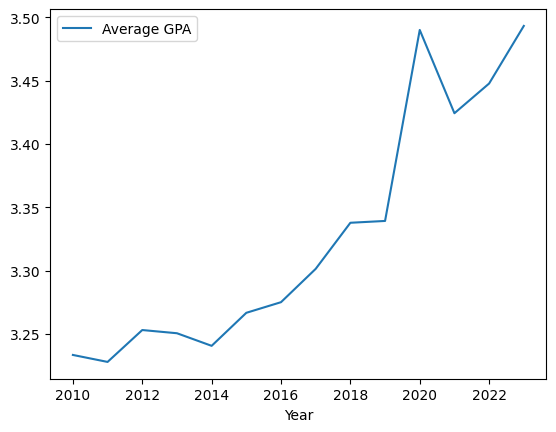

In [102]:
df_year.plot.line(x = "Year", y = "Average GPA")

***Side Note***: If you're using **Visual Studio Code** on **dark mode**, you may not be able to see the **axes** and **axes labels** of the graph. 

**Only if** this is the case, please **copy and run** the following **two lines** of code in a cell:

---
```py
from matplotlib import style
style.use('dark_background')
```
---

And then **re-run your plotting code** above. 

### Analysis: Plotted GPA over Time

**Q5: Note a few observations you have about the changes to `Average GPA` at Illinois over time. Is there an overall trend? What events could have spiked increases to the Average GPA? Respond with at least three sentences.** 


*(✏️ Average GPA is climbing over the year. The GPA made a leap during the COVID year. However as lockdown happened the average GPA droppedd back down. ✏️)*

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)